In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from mpl_toolkits.mplot3d import axes3d

In [ ]:
data = pd.read_csv('/content/bank-full.csv',sep=';')
data 

In [ ]:
data.boxplot(column=['balance'], rot=90,figsize=(5,4)); plt.show()
data.boxplot(column=['duration'], rot=90,figsize=(5,4)); plt.show()
data.boxplot(column=['age'], rot=90,figsize=(5,4)); plt.show()
data.boxplot(column=['day'], rot=90,figsize=(5,4)); plt.show()

5. Modelo de predicción y evaluación del modelo 

Utilizaremos un modelo de predicción tipo árbol de decisión donde las variables que consideramos son: balance, 

In [ ]:
X=data[['balance']]; Y=data["y"]
arbol=tree.DecisionTreeClassifier(criterion="gini", min_samples_split=100, min_samples_leaf=50)
arbol.fit(X,Y)
fig = plt.figure(figsize=(10,5))
tree.plot_tree(arbol, feature_names=X.columns,class_names=["yes", "no"] ,filled=True); plt.show()

In [ ]:
def cargar_datos(nombre_archivo:str)->pd.DataFrame:
    return pd.read_csv(nombre_archivo)
datos = cargar_datos('/content/exoplanetas.csv')

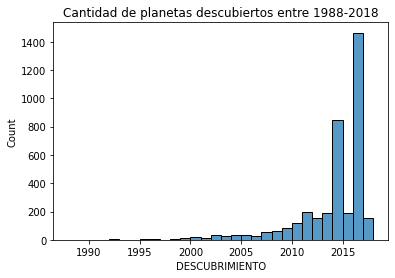

In [ ]:
def histograma_descubrimiento(datos:pd.DataFrame)->None:
    sb.histplot(datos['DESCUBRIMIENTO'], bins=30)
    plt.title('Cantidad de planetas descubiertos entre 1988-2018')
    plt.show()

histograma_descubrimiento(datos)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


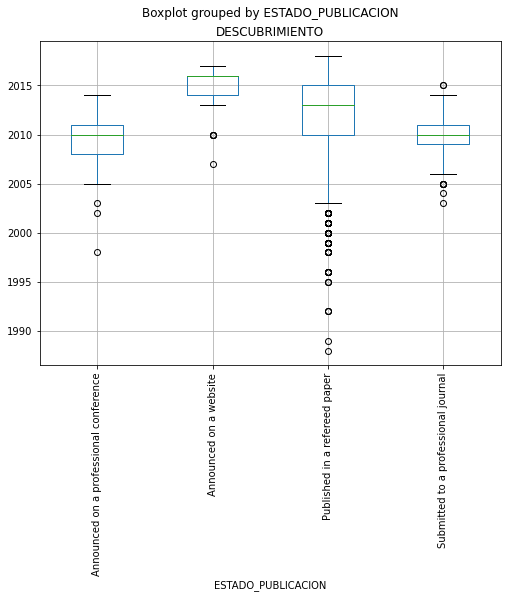

In [ ]:
def estado_publicacion_por_descubrimiento(datos:pd.DataFrame)->None:
    datos.boxplot(column='DESCUBRIMIENTO', by='ESTADO_PUBLICACION',
             rot=90,figsize=(8,6))
    plt.show()

estado_publicacion_por_descubrimiento(datos)

In [ ]:
def deteccion_por_descubrimiento(datos:pd.DataFrame)->None:
    datos.boxplot(column='DESCUBRIMIENTO', by='TIPO_DETECCION',rot=90,figsize=(8,6))
    plt.show()

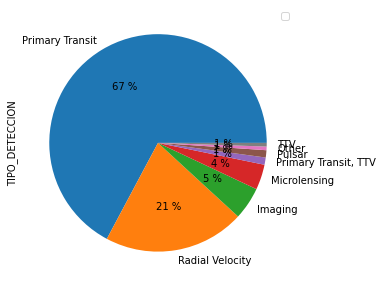

In [ ]:
def deteccion_y_descubrimiento(datos:pd.DataFrame,anho:int)->None:
    if anho==0:
      datos['Tipo de detección'] = np.arange(1,len(datos.index)+1,1)
      pie_counts = pd.DataFrame(datos.groupby('TIPO_DETECCION').count())
      pie_counts.plot.pie(y='Tipo de detección', autopct='%0.f %%', figsize=(10, 5))
      plt.legend([]); plt.show()
    else:
      df = datos.groupby('DESCUBRIMIENTO')['TIPO_DETECCION'].value_counts()
      df[anho].plot.pie(y='Tipo de detección', autopct='%0.f %%', figsize=(10, 5))
      plt.legend([]); plt.show()

deteccion_y_descubrimiento(datos,2015)

In [ ]:
def cantidad_y_tipo_deteccion(datos:pd.DataFrame)->None:
    df = pd.DataFrame(datos.groupby('TIPO_DETECCION'))
    plt.figure(figsize=(9,4))
    for i in range(8):
      plt.plot(df.loc[i][1].groupby('DESCUBRIMIENTO').count().index,
              df.loc[i][1].groupby('DESCUBRIMIENTO').count()['index'],
              label=df.loc[i][0])
    plt.title('Cantidad de planetas descubiertos por tipo de detección')
    plt.xlabel('Año'); plt.ylabel('Cantidad de planetas'); plt.legend(); plt.show()

cantidad_y_tipo_deteccion(datos)

In [ ]:
def masa_promedio_y_tipo_deteccion(datos:pd.DataFrame)->None:
    df = pd.DataFrame(datos.groupby('TIPO_DETECCION'))
    plt.figure(figsize=(9,4))
    for i in range(8):
      plt.plot(df.loc[i][1].groupby('DESCUBRIMIENTO').count().index,
              df.loc[i][1].groupby('DESCUBRIMIENTO').mean()['MASA'],
              label=df.loc[i][0])
    plt.title('Masa promedio de los planetas por tipo de detección')
    plt.xlabel('Año'); plt.ylabel('Masa promedio'); plt.legend(); plt.show()

In [ ]:
def masa_planetas_vs_masa_estrellas(datos: pd.DataFrame)->None:
    plt.figure(figsize=(9,4))
    plt.scatter(datos['MASA'],datos['MASA_ESTRELLA'], s=4, c='darkred')
    plt.title('Masa de los planetas vs masa de la estrella más cercana')
    plt.xlabel('Masa del planeta'); plt.ylabel('Masa de la estrella (log)')
    plt.yscale("log"); plt.show()

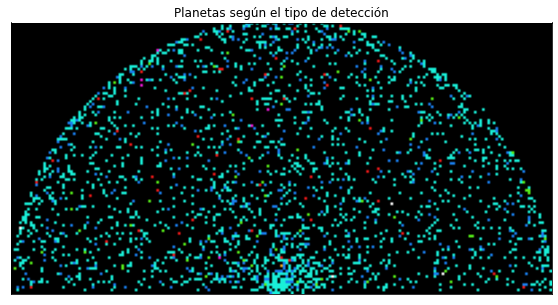

In [ ]:
def graficar_cielo(datos:pd.DataFrame)->list:
    plt.figure(figsize=(10,5))
    im = np.zeros((101,201,3))
    for p in range(len(datos)):
      Fp = 99-abs(np.sin(datos['RA'][p])*np.cos(datos['DEC'][p])*100)
      Cp = np.cos(datos['DEC'][p])*np.cos(datos['RA'][p])*100 + 100
      if datos['TIPO_DETECCION'][p] == 'Astrometry': im[round(Fp)][round(Cp)] = np.array([0.94,0.65,0.1])
      if datos['TIPO_DETECCION'][p] == 'Imaging': im[round(Fp)][round(Cp)] = np.array([0.34,0.94,0.1])
      if datos['TIPO_DETECCION'][p] == 'Microlensing': im[round(Fp)][round(Cp)] = np.array([0.94,0.1,0.1])
      if datos['TIPO_DETECCION'][p] == 'Other': im[round(Fp)][round(Cp)] = np.array([0.94,0.1,0.85])
      if datos['TIPO_DETECCION'][p] == 'Primary Transit': im[round(Fp)][round(Cp)] = np.array([0.1,0.94,0.85])
      if datos['TIPO_DETECCION'][p] == 'TTV': im[round(Fp)][round(Cp)] = np.array([1,1,1])
      if datos['TIPO_DETECCION'][p] == 'Radial Velocity': im[round(Fp)][round(Cp)] = np.array([0.1,0.5,0.94])
    plt.imshow(im); plt.title('Planetas según el tipo de detección')
    plt.xticks([]); plt.yticks([]); plt.show()
    return 

graficar_cielo(datos)

In [ ]:
def filtrar_imagen_cielo(imagen:list)->None:
    """ Le aplica a la imagen un filtro de convolucion basado en la matriz
        [[-1,-1,-1],[-1,9,-1],[-1,-1,-1]]
    Parametros:
        imagen (list): una matriz con la imagen del cielo
    """
    pass